In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# book

In [3]:
books = pd.read_csv('Books.csv')

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\679519066.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [4]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [5]:
# checking for duplicates 
books.duplicated().sum()

0

In [6]:
k = pd.to_numeric(books['Year-Of-Publication'],errors='coerce')

In [7]:
index = k[k.isna()].index
index

Int64Index([209538, 220731, 221678], dtype='int64')

In [8]:
books.loc[[209538]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN


In [9]:
for i in index:
    books['Publisher'].loc[i] = books['Year-Of-Publication'].loc[i]
    books['Year-Of-Publication'].loc[i] = books['Book-Author'].loc[i]
    books['Book-Author'].loc[i] = 'Unknown'

In [10]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('float')

In [11]:
books.loc[[209538]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Unknown,2000.0,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN


In [12]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
books = books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-M']]

In [14]:
books.fillna('Unknown',inplace=True)

In [15]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [16]:
# rating

In [17]:
ratings = pd.read_csv('Ratings.csv')

In [18]:
ratings.duplicated().sum()

0

In [19]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [20]:
ratings['Book-Rating'].value_counts()
# here 0 rating means no rating 

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [21]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [22]:
# users

In [23]:
users = pd.read_csv('Users.csv')

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\1414118947.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv('Users.csv')


In [24]:
users

,User-ID,Location,Age,City,State,Country,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,"nyc, new york, usa",NaN,nyc,new york,usa,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"stockton, california, usa",18.0,stockton,california,usa,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa,NaN,NaN,NaN,NaN,NaN,NaN
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom,NaN,NaN,NaN,NaN,NaN,NaN
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada,NaN,NaN,NaN,NaN,NaN,NaN
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# getting index of the rows whose country data is error 

In [26]:
index1 = users[users['Unnamed: 11'].notna()].index
index1 

Int64Index([235181, 241302], dtype='int64')

In [27]:
index2 = users[users['Unnamed: 10'].notna()].index
index2 

Int64Index([60008, 235181, 241302, 273097], dtype='int64')

In [28]:
index3 = users[users['Unnamed: 9'].notna()].index
index3 

Int64Index([60008, 108113, 189617, 194259, 215970, 235181, 241302, 273097], dtype='int64')

In [29]:
index4 = users[users['Unnamed: 8'].notna()].index
index4 

Int64Index([ 60008,  76342,  85972, 104037, 108113, 108496, 122334, 122814,
            189617, 194259, 215970, 227901, 235181, 241302, 243263, 258822,
            262288, 273097, 274065],
           dtype='int64')

In [30]:
index5 = users[users['Unnamed: 7'].notna()].index
index5 

Int64Index([  4468,   5641,   6557,   9695,  12512,  17381,  17884,  21124,
             43946,  46964,  48738,  55159,  58849,  60008,  61675,  65857,
             66143,  66147,  68644,  72822,  73361,  76342,  82756,  83738,
             84897,  85108,  85972,  97080,  98124, 104037, 108113, 108496,
            113788, 118988, 120092, 120835, 122334, 122814, 124424, 131301,
            154405, 155547, 155588, 155733, 158135, 161512, 164215, 164758,
            175617, 176824, 179621, 189617, 193930, 194259, 203908, 206234,
            207314, 212652, 215970, 222189, 225434, 226939, 227901, 228791,
            230891, 234619, 235181, 235579, 235899, 237427, 241302, 243263,
            249300, 255786, 255932, 258217, 258822, 261650, 262288, 263333,
            264458, 264917, 265496, 266273, 269657, 270111, 273097, 273290,
            274054, 274065, 275707],
           dtype='int64')

In [31]:
index6 = users[users['Unnamed: 6'].notna()].index
index6 

Int64Index([   435,    814,    840,    956,   1459,   1520,   1829,   2238,
              2417,   2560,
            ...
            276626, 277168, 277355, 277373, 277645, 277717, 277753, 278028,
            278214, 278808],
           dtype='int64', length=1485)

In [32]:
# lets correct the country name for the above indexes

In [33]:
for i in index1: 
    users['Country'].loc[i] = users['Unnamed: 11'].loc[i]
    print(users['Country'].loc[i])

 india
 india


C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\842958523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'].loc[i] = users['Unnamed: 11'].loc[i]


In [34]:
for i in index2: 
    users['Country'].loc[i] = users['Unnamed: 10'].loc[i]

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\2943262725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'].loc[i] = users['Unnamed: 10'].loc[i]


In [35]:
for i in index3: 
    users['Country'].loc[i] = users['Unnamed: 9'].loc[i]

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\150948472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'].loc[i] = users['Unnamed: 9'].loc[i]


In [36]:
for i in index4: 
    users['Country'].loc[i] = users['Unnamed: 8'].loc[i]

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\1183606812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'].loc[i] = users['Unnamed: 8'].loc[i]


In [37]:
for i in index5: 
    users['Country'].loc[i] = users['Unnamed: 7'].loc[i]

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\3833833765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'].loc[i] = users['Unnamed: 7'].loc[i]


In [38]:
for i in index6: 
    users['Country'].loc[i] = users['Unnamed: 6'].loc[i]

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\3658890303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'].loc[i] = users['Unnamed: 6'].loc[i]


In [39]:
# checking for null values 
users.isna().sum()

User-ID             0
Location            0
Age            110762
City              561
State             254
Country          4575
Unnamed: 6     277373
Unnamed: 7     278767
Unnamed: 8     278839
Unnamed: 9     278850
Unnamed: 10    278854
Unnamed: 11    278856
dtype: int64

In [40]:
k = users[users['Country'].isna()].index
k

Int64Index([    18,     90,    311,    317,    536,    557,    729,    766,
               776,    788,
            ...
            278321, 278364, 278438, 278523, 278568, 278624, 278651, 278697,
            278716, 278776],
           dtype='int64', length=4575)

In [41]:
for i in k :
     users['Country'].loc[i] = users['City'].loc[i]
    

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\882477690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'].loc[i] = users['City'].loc[i]


In [42]:
users = users[['User-ID','Age','Country']]

In [43]:
# checking for null values 
users.isna().sum()
# age column has lots of missing values let us impute them after merging 

User-ID         0
Age        110762
Country        78
dtype: int64

In [44]:
users['Country'].mode()
# replacing the unknown values with mode frequent obtained value  

0     usa
Name: Country, dtype: object

In [45]:
users['Country'].fillna('usa',inplace=True)

C:\Users\Rohith Challam\AppData\Local\Temp\ipykernel_3668\1906828689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['Country'].fillna('usa',inplace=True)


In [46]:
users

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa
2,3,NaN,russia
3,4,17.0,portugal
4,5,NaN,united kingdom
...,...,...,...
278853,278854,NaN,usa
278854,278855,50.0,united kingdom
278855,278856,NaN,canada
278856,278857,NaN,usa


#### usually popularity depends on average rating and no of users given the rating 
#### ie. ,the avg rating  has to be greater and no of people given rating should be higher.


### Popularity Based Recommendation System

First we are going to make "POPULARITY BASED RECOMMENDATION SYSTEM"
- POPULARITY BASED RECOMMENDATION SYSTEM will show **top 25** books from the dataset which has **minimum 250 ratings** and **minimum average rating of 4** by Users

In [47]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [48]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [49]:
booknrating = books.merge(ratings,on='ISBN')
booknrating.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0
5,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,67544,8
6,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,96054,0
8,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,116866,9
9,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,123629,9


In [50]:
no_of_ratings = booknrating.groupby('Book-Title').count()['Book-Rating'].reset_index()
no_of_ratings.rename(columns={'Book-Rating':'no_of_ratings'},inplace=True)
no_of_ratings

,Book-Title,no_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [51]:
no_of_ratings.sort_values('no_of_ratings',ascending=False)

,Book-Title,no_of_ratings
234951,Wild Animus,2502
196326,The Lovely Bones: A Novel,1295
183573,The Da Vinci Code,898
5303,A Painted House,838
199237,The Nanny Diaries: A Novel,828
...,...,...
147559,Real Love: The Truth About Finding Uncondition...,1
147558,Real Love: The Drawings for Sean,1
147557,"Real Love or Fake (Camfield Novel of Love, No 78)",1
63664,Fabulous Food for Family and Friends: Healthy ...,1


In [52]:
avg_ratings = booknrating.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_ratings.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_ratings = avg_ratings.round(2)
avg_ratings

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
...,...,...
241066,Ã?Â?lpiraten.,0.00
241067,Ã?Â?rger mit Produkt X. Roman.,5.25
241068,Ã?Â?sterlich leben.,7.00
241069,Ã?Â?stlich der Berge.,2.67


In [53]:
avg_ratings.sort_values('avg_ratings',ascending=False)

,Book-Title,avg_ratings
66223,Film Is: The International Free Cinema,10.0
123125,More Secrets of Happy Children: Embrace Your P...,10.0
96558,Jo's Boys : From the Original Publisher,10.0
212107,The Vanished Priestess : An Annie Szabo Mystery,10.0
72503,Game and Hunting,10.0
...,...,...
165525,Sports Hall of Shame,0.0
165524,Sports Great: Will Clark (Sports Great Books),0.0
165523,Sports Great Shaquille O'Neal (Sports Great Bo...,0.0
165522,Sports Great Roger Clemens (Sports Great Books...,0.0


In [54]:
popular_books = no_of_ratings.merge(avg_ratings,on='Book-Title')
popular_books

,Book-Title,no_of_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.00
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.25
241068,Ã?Â?sterlich leben.,1,7.00
241069,Ã?Â?stlich der Berge.,3,2.67


In [55]:
#### as mentioned above we only consider books having ratings > 250 and having an avg_rating > 4.0 as mentioned above

In [56]:
popular_books = popular_books[popular_books['no_of_ratings']>=250].sort_values('no_of_ratings',ascending=False)
popular_books = popular_books[popular_books['avg_ratings']>=4].sort_values('avg_ratings',ascending=False).head(25)
popular_books.shape

(25, 3)

In [57]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


In [58]:
popular_books = popular_books.merge(books,on='Book-Title').drop_duplicates('Book-Title')
popular_books

,Book-Title,no_of_ratings,avg_ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.85,0439136350,J. K. Rowling,1999.0,Scholastic,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.82,0439139597,J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.74,0590353403,J. K. Rowling,1998.0,Scholastic,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.50,043935806X,J. K. Rowling,2003.0,Scholastic,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.18,0439064872,J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.01,0345339681,J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.95,0345339703,J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.90,059035342X,J. K. Rowling,1999.0,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.88,0345339711,J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.70,0446310786,Harper Lee,1988.0,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...


In [59]:
from pickle import dump
dump(popular_books,open('popular_25.sav','wb'))

In [60]:
booknrating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [61]:
df = users.merge(booknrating,on='User-ID')
df

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating
0,2,18.0,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0
1,8,NaN,canada,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,5
2,8,NaN,canada,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,0
3,8,NaN,canada,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,0
4,8,NaN,canada,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,0
...,...,...,...,...,...,...,...,...,...,...
1031131,278854,NaN,usa,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,7
1031132,278854,NaN,usa,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,0
1031133,278854,NaN,usa,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,0
1031134,278854,NaN,usa,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,6


In [62]:
t = df.dropna()
t 

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating
0,2,18.0,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0
21,10,26.0,spain,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001.0,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,0
36,19,14.0,weston,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003.0,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,7
37,20,19.0,usa,0425163091,Chocolate Jesus,Stephan Jaramillo,1998.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,0
48,36,24.0,canada,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979.0,Fireside,http://images.amazon.com/images/P/067176537X.0...,0
...,...,...,...,...,...,...,...,...,...,...
1031123,278851,33.0,usa,0767907566,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,5
1031124,278851,33.0,usa,0884159221,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,7
1031125,278851,33.0,usa,0912333022,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,7
1031126,278851,33.0,usa,1569661057,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999.0,American Map Corporation,http://images.amazon.com/images/P/1569661057.0...,10


In [63]:
w = t.groupby(['Book-Title']).mean()[['Age']].reset_index()
w = w.round()
w

,Book-Title,Age
0,A Light in the Storm: The Civil War Diary of ...,17.0
1,Always Have Popsicles,44.0
2,Apple Magic (The Collector's series),62.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",40.0
4,Dark Justice,52.0
...,...,...
205169,Ã?Â?lpiraten.,41.0
205170,Ã?Â?rger mit Produkt X. Roman.,44.0
205171,Ã?Â?sterlich leben.,51.0
205172,Ã?Â?stlich der Berge.,41.0


In [64]:
new_df = df.merge(w, on='Book-Title',how ='left')
new_df['Age_x'] = new_df['Age_x'].fillna(new_df['Age_y'])
new_df

,User-ID,Age_x,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating,Age_y
0,2,18.0,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0,24.0
1,8,37.0,canada,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,5,37.0
2,8,56.0,canada,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,0,56.0
3,8,47.0,canada,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,0,47.0
4,8,NaN,canada,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1031131,278854,37.0,usa,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,7,37.0
1031132,278854,41.0,usa,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,0,41.0
1031133,278854,38.0,usa,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,0,38.0
1031134,278854,41.0,usa,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,6,41.0


In [65]:
new_df.drop(['Age_y'],inplace=True,axis=1)
new_df.rename(columns={'Age_x':'Age'},inplace=True)

In [66]:
new_df.isna().sum()

User-ID                    0
Age                    40608
Country                    0
ISBN                       0
Book-Title                 0
Book-Author                0
Year-Of-Publication        0
Publisher                  0
Image-URL-M                0
Book-Rating                0
dtype: int64

In [67]:
new_df['Age'].fillna(new_df['Age'].mode()[0],inplace=True)

In [68]:
new_df.isna().sum()

User-ID                0
Age                    0
Country                0
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
Book-Rating            0
dtype: int64

In [69]:
## plotting

In [70]:
merged_df = new_df.copy()

In [71]:
merged_df.head()

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating
0,2,18.0,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0
1,8,37.0,canada,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,5
2,8,56.0,canada,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,0
3,8,47.0,canada,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,0
4,8,38.0,canada,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,0


In [72]:
merged_df['Age_grp'] =  pd.cut(merged_df['Age'],bins=[0,18,150],labels=['Kids','Adult'])

In [73]:
merged_df

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating,Age_grp
0,2,18.0,usa,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,0,Kids
1,8,37.0,canada,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,5,Adult
2,8,56.0,canada,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,0,Adult
3,8,47.0,canada,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,0,Adult
4,8,38.0,canada,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...
1031131,278854,37.0,usa,0375703063,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997.0,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,7,Adult
1031132,278854,41.0,usa,0515087122,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990.0,Jove Books,http://images.amazon.com/images/P/0515087122.0...,0,Adult
1031133,278854,38.0,usa,0553578596,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000.0,Bantam,http://images.amazon.com/images/P/0553578596.0...,0,Adult
1031134,278854,41.0,usa,0553275739,In Her Day,Rita Mae Brown,1988.0,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,6,Adult


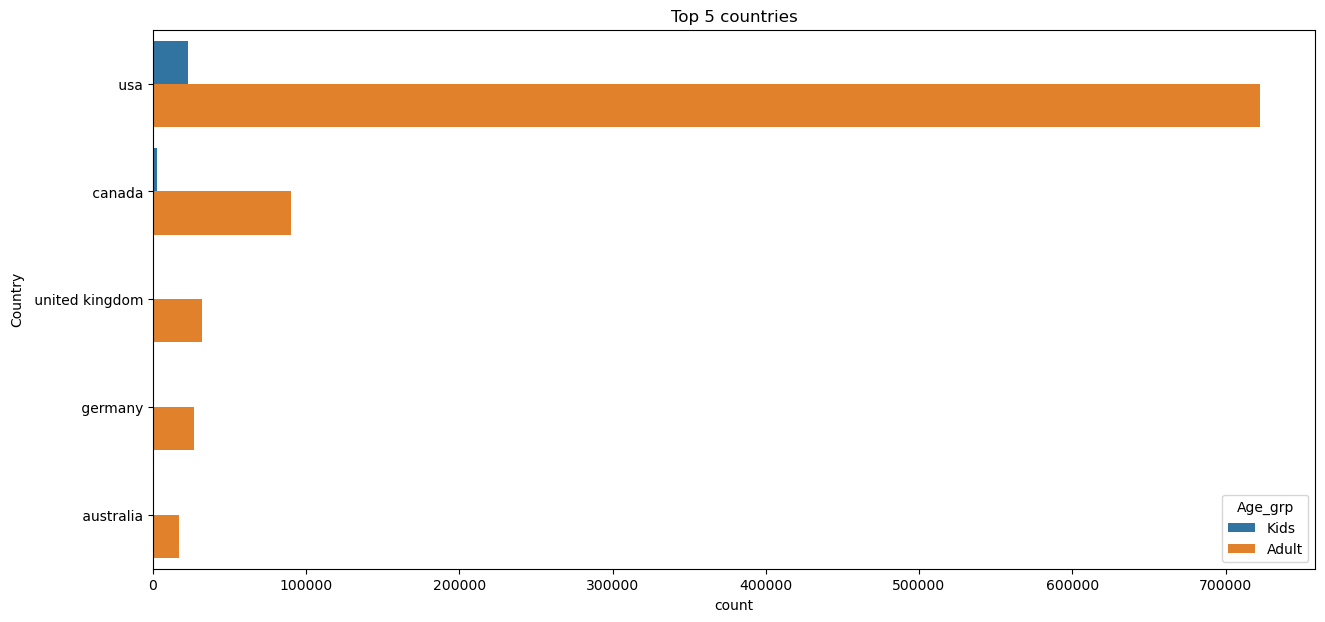

In [74]:
## top 5 countries from where the user traffic is  high 
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=merged_df,hue='Age_grp',order=pd.value_counts(merged_df['Country']).iloc[:5].index)
plt.title('Top 5 countries')
plt.show()

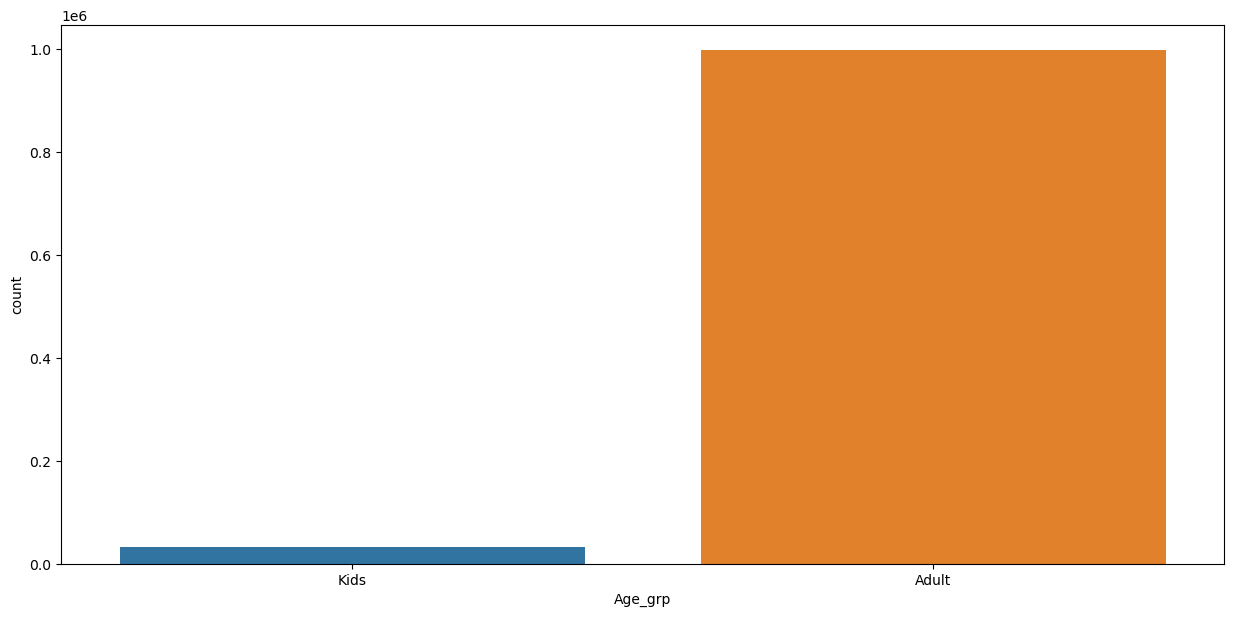

In [75]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'Age_grp',data = merged_df)
plt.show()

In [76]:
merged_df.groupby(['Age_grp']).count()[['Age']]

,Age
Age_grp,
Kids,31929
Adult,997717


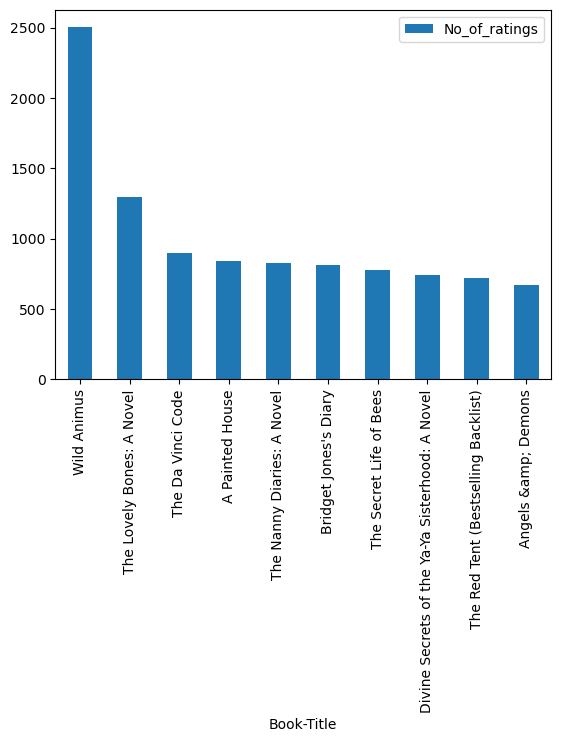

In [77]:
merged_df.groupby(['Book-Title']).count()[['Book-Rating']].sort_values('Book-Rating',ascending=False)[:10].plot(kind ='bar')
plt.legend(['No_of_ratings'])
plt.show()

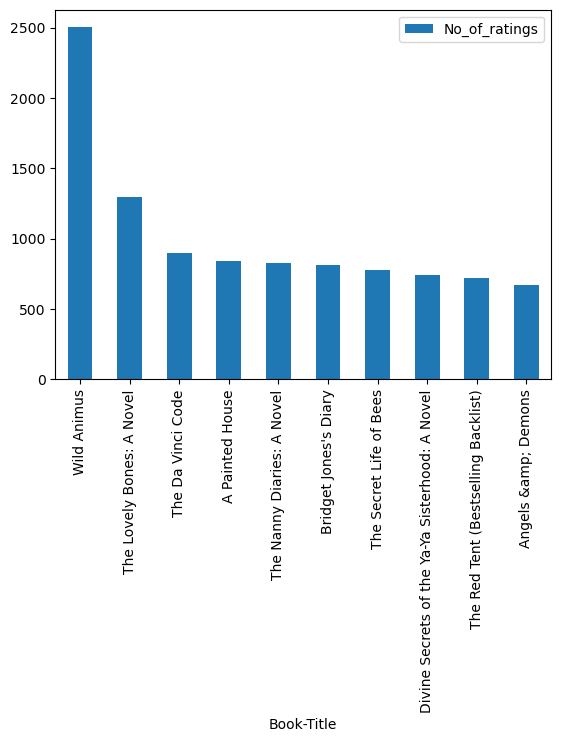

In [78]:
merged_df.groupby(['Book-Title']).count()[['Book-Rating']].sort_values('Book-Rating',ascending=False)[:10].plot(kind ='bar')
plt.legend(['No_of_ratings'])
plt.show()

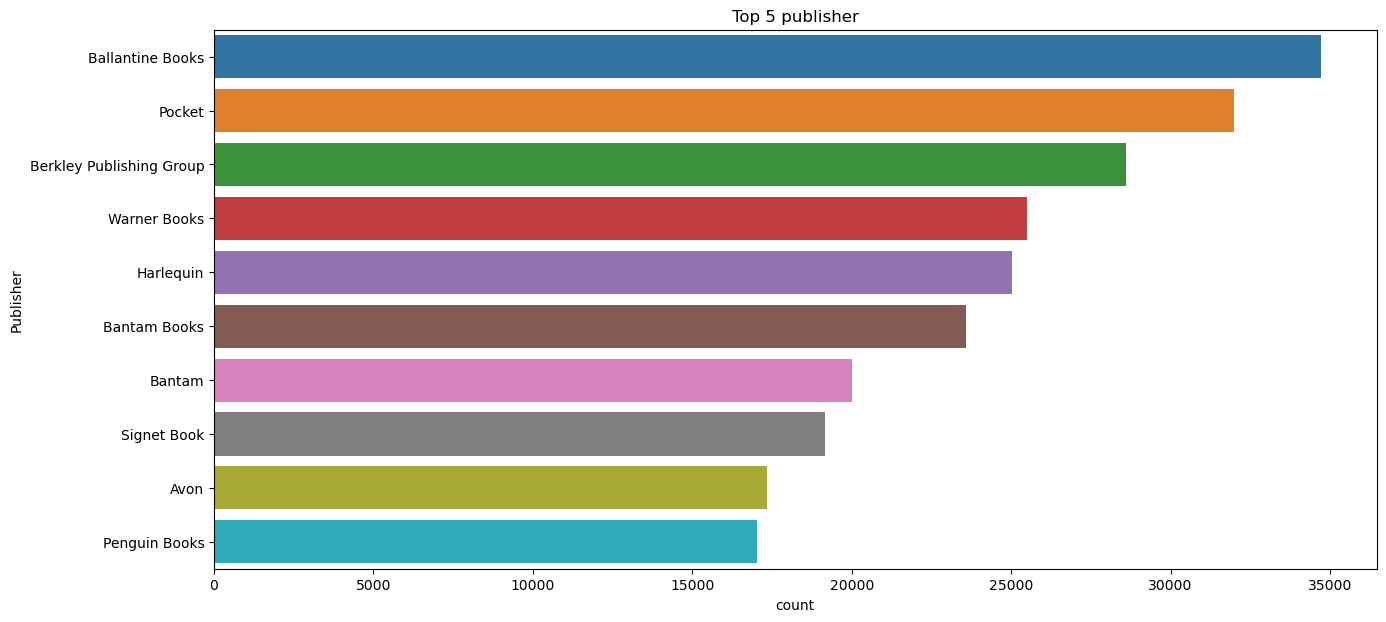

In [79]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=merged_df,order=pd.value_counts(merged_df['Publisher']).iloc[:10].index)
plt.title('Top 5 publisher')
plt.show()

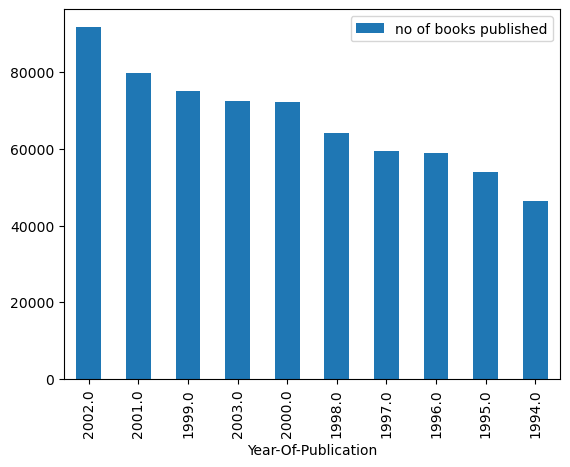

In [80]:
merged_df.groupby(['Year-Of-Publication']).count()[['Book-Title']].sort_values('Book-Title',ascending=False).iloc[:10,:].plot(kind ='bar')
plt.legend(['no of books published'])
plt.show()

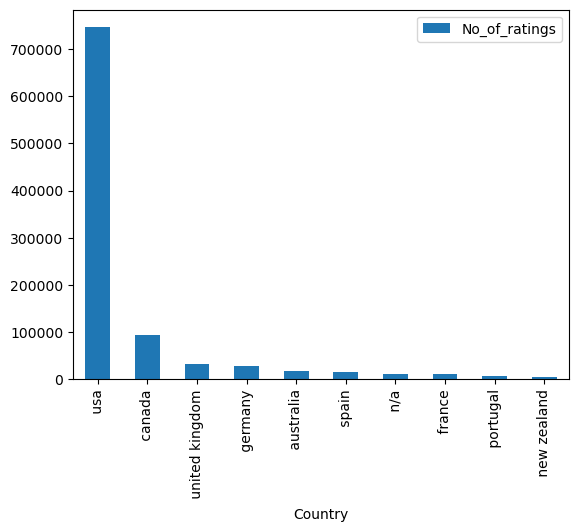

In [81]:
merged_df.groupby(['Country']).count()[['Book-Title']].sort_values('Book-Title',ascending=False)[:10].plot(kind ='bar')
plt.legend(['No_of_ratings'])
plt.show()

### Collaborative Filtering Based Recommender System

In [82]:
# let us consider only users who have read atleast 200 books 

In [83]:
x = new_df.groupby('User-ID').count()['Book-Rating'] > 200
x[x].index

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [84]:
new_df = new_df[new_df['User-ID'].isin(x[x].index)]
new_df

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating
311,254,24.0,usa,0804106304,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,0
312,254,24.0,usa,0316769487,The Catcher in the Rye,J.D. Salinger,1991.0,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,0
313,254,24.0,usa,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,0
314,254,24.0,usa,0060013117,Night Watch,Terry Pratchett,2002.0,HarperCollins,http://images.amazon.com/images/P/0060013117.0...,0
315,254,24.0,usa,0060199563,Thief of Time,Terry Pratchett,2001.0,HarperCollins Publishers,http://images.amazon.com/images/P/0060199563.0...,0
...,...,...,...,...,...,...,...,...,...,...
1030506,278418,38.0,usa,1882419944,McSe Rapid Review for Tcp/Ip Microsoft Windows...,Michael A. Pastore,1998.0,29th Street Press,http://images.amazon.com/images/P/1882419944.0...,0
1030507,278418,38.0,usa,1882419952,Windows Nt Server 4.0 in the Enterprise (Rapid...,Michael A. Pastore,1999.0,29th Street Press,http://images.amazon.com/images/P/1882419952.0...,0
1030508,278418,38.0,usa,1882419960,McSe Systems Management Server 1.2: Rapid Revi...,Michael A. Pastore,1998.0,29th Street Press,http://images.amazon.com/images/P/1882419960.0...,0
1030509,278418,38.0,usa,1892083043,Gotcha! Strategy Games for Math and Logic (Hom...,Denise Gaskins,1998.0,Tabletop Academy Pr,http://images.amazon.com/images/P/1892083043.0...,0


In [85]:
# considering only books having no of ratings >= 50 

In [86]:
y = new_df.groupby('Book-Title').count()['Book-Rating']>=50
y[y].index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [87]:
new_df = new_df[new_df['Book-Title'].isin(y[y].index)]
new_df

,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Book-Rating
311,254,24.0,usa,0804106304,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,0
312,254,24.0,usa,0316769487,The Catcher in the Rye,J.D. Salinger,1991.0,"Little, Brown",http://images.amazon.com/images/P/0316769487.0...,0
313,254,24.0,usa,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001.0,Plume Books,http://images.amazon.com/images/P/0452282152.0...,0
333,254,24.0,usa,0375823352,"The Amber Spyglass (His Dark Materials, Book 3)",PHILIP PULLMAN,2002.0,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375823352.0...,0
334,254,24.0,usa,037582345X,"The Golden Compass (His Dark Materials, Book 1)",PHILIP PULLMAN,2002.0,Knopf Books for Young Readers,http://images.amazon.com/images/P/037582345X.0...,9
...,...,...,...,...,...,...,...,...,...,...
1028036,278418,31.0,usa,0440220394,A Wrinkle in Time,L'Engle Madelein,1996.0,Laurel-Leaf Books,http://images.amazon.com/images/P/0440220394.0...,0
1028037,278418,36.0,usa,0451139682,Different Seasons,Stephen King,1983.0,Signet Book,http://images.amazon.com/images/P/0451139682.0...,0
1028155,278418,44.0,usa,0373107455,Coming Home,Alison Fraser,1984.0,Harlequin,http://images.amazon.com/images/P/0373107455.0...,0
1028376,278418,36.0,usa,0345327853,Beloved,BERTRICE SMALL,1985.0,Ballantine Books,http://images.amazon.com/images/P/0345327853.0...,0


In [88]:
pivot_table = new_df.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating').fillna(0)
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
dump(pivot_table,open('pivot_table.sav','wb'))

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(pivot_table)

In [91]:
similarity.shape

(706, 706)

In [92]:
dump(similarity,open('similarity.sav','wb'))

In [93]:
def recommend(book):
    index = np.where(pivot_table.index==book)[0][0]
    similar_books =sorted(list(enumerate(similarity[index])),key=lambda x:x[1],reverse=True)[1:11]
    
    data = []
    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == pivot_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

In [94]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141146.01.MZZZZZZZ.jpg']

In [469]:
books.drop_duplicates('Book-Title',inplace = True)

In [470]:
dump(books,open('books.sav','wb'))